In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import matplotlib.patches as mpatches

In [176]:
schedule = pd.read_csv('data/sol_lt_500.tsv',delimiter='\t')
schedule['a*'] = schedule['a*'].apply(ast.literal_eval)
schedule['x'] = schedule['a*'].apply(lambda x: sum(x))
schedule

,D,T,a*,x
0,1,1,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",4
1,1,4,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ...",4
2,1,6,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ...",4
3,1,8,"[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4
4,1,11,"[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
...,...,...,...,...
87,5,25,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4
88,5,27,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4
89,5,29,"[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",4
90,5,31,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4


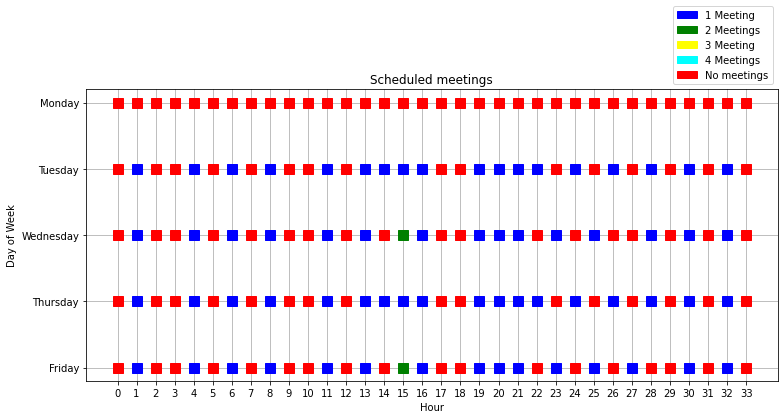

num meetings:  70


In [295]:
def plot_schedule_map(schedule):
    incr = 0

    plt.figure(figsize=(11, 5))
    plt.title(f"Scheduled meetings")
    
    days = range(1,6)
    times = range(1,35)
    # Create a plot for each course
    for d in days:
        for t in times:
            meetings = sum((schedule['D']==d)&(schedule['T']==t))
            
            if meetings == 1:
                plt.plot(t, d, 'bs', markersize=10)
                incr += 1
            elif meetings == 2:
                plt.plot(t, d, 'gs', markersize=10)
                incr += 2 
            elif meetings == 3:
                plt.plot(t, d, 'ys', markersize=10)
                incr += 3
            elif meetings == 4:
                plt.plot(t, d, 'cs', markersize=10)
                incr += 4
            else:
                plt.plot(t, d, 'rs', markersize=10)
    plt.yticks(days, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
    plt.xticks(times)
    plt.gca().invert_yaxis()
    plt.xlabel('Hour')
    plt.ylabel('Day of Week')
    plt.grid(True)
    plt.tight_layout()

    one = mpatches.Patch(color='blue', label='1 Meeting')
    two = mpatches.Patch(color='green', label='2 Meetings')
    three = mpatches.Patch(color='yellow', label='3 Meeting')
    four = mpatches.Patch(color='cyan', label='4 Meetings')
    no = mpatches.Patch(color='red', label='No meetings')

    plt.legend(handles=[one,two,three,four,no], loc='lower right', bbox_to_anchor=(1,1))

    plt.show()
    print('num meetings: ', incr)
plot_schedule_map(schedule=schedule)

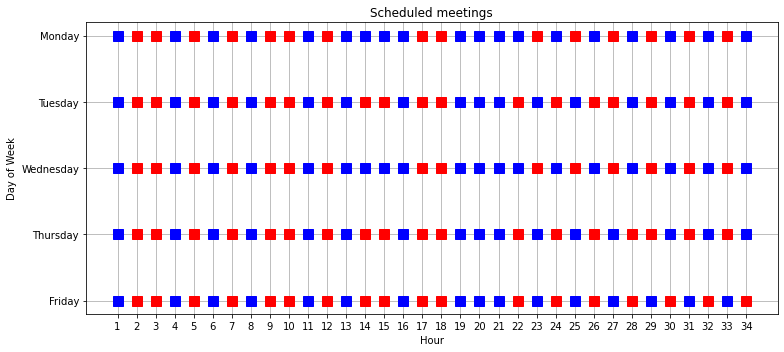

num meetings:  86


In [126]:
plot_schedule_map(schedule=schedule)

In [299]:
def plot_tabu_schedule_map(schedule):
    incr = 0

    plt.figure(figsize=(11, 5))
    plt.title(f"Scheduled meetings")
    
    days = range(5)
    times = range(34)
    # Create a plot for each course
    for d in days:
        for t in times:
            meetings = sum((schedule['day']==d)&(schedule['time']==t))
            
            if meetings == 1:
                plt.plot(t, d, 'bs', markersize=10)
                incr += 1
            elif meetings == 2:
                plt.plot(t, d, 'gs', markersize=10)
                incr += 2 
            elif meetings == 3:
                plt.plot(t, d, 'ys', markersize=10)
                incr += 3
            elif meetings == 4:
                plt.plot(t, d, 'cs', markersize=10)
                incr += 4
            else:
                plt.plot(t, d, 'rs', markersize=10)
    plt.yticks(days, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
    plt.xticks(times)
    plt.gca().invert_yaxis()
    plt.xlabel('Hour')
    plt.ylabel('Day of Week')
    plt.grid(True)
    plt.tight_layout()

    one = mpatches.Patch(color='blue', label='1 Meeting')
    two = mpatches.Patch(color='green', label='2 Meetings')
    three = mpatches.Patch(color='yellow', label='3 Meeting')
    four = mpatches.Patch(color='cyan', label='4 Meetings')
    no = mpatches.Patch(color='red', label='No meetings')

    plt.legend(handles=[one,two,three,four,no], loc='lower right', bbox_to_anchor=(1,1))

    plt.show()
    print('num meetings: ', incr)

In [308]:
tabu_schedule_members = pd.read_csv('data/tabusearch/bestSolution.csv')
tabu_schedule_chairs = pd.read_csv('data/tabusearch/bestSolutionChair.csv')

#tabu_schedule_members = tabu_schedule_members.where(tabu_schedule_members['seed']!='seed').dropna()
#tabu_schedule_members.apply(ast.literal_eval)

tabu_schedule_chairs = tabu_schedule_chairs.where(tabu_schedule_chairs['seed']!='seed').dropna()
tabu_schedule_chairs['day'] = tabu_schedule_chairs['day'].apply(ast.literal_eval)
tabu_schedule_chairs['time'] = tabu_schedule_chairs['time'].apply(ast.literal_eval)

seeds = tabu_schedule_chairs['seed'].unique()
seeds = seeds[~pd.isnull(seeds)]

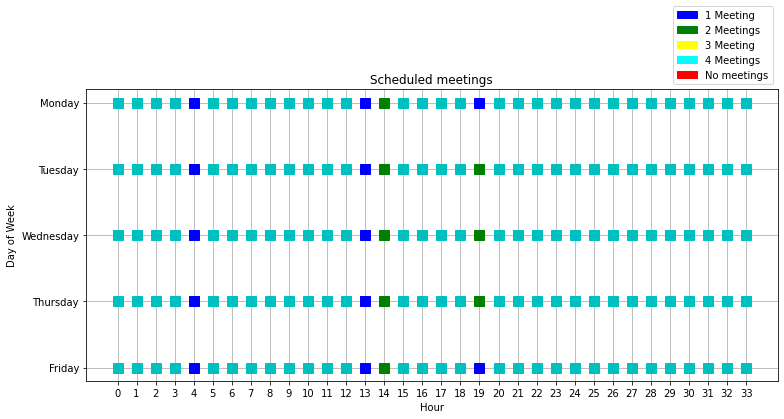

num meetings:  628


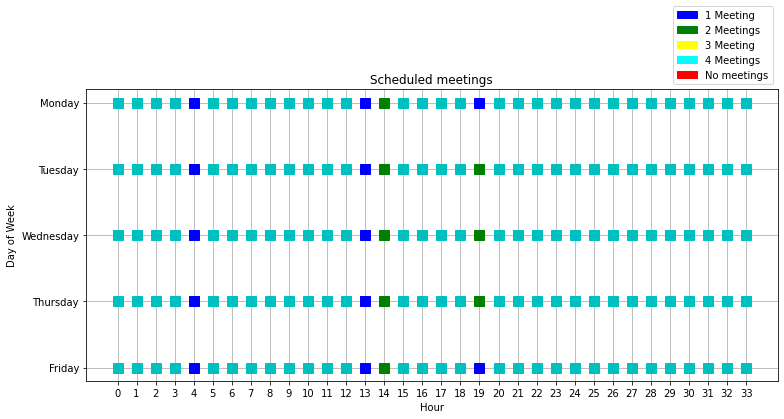

num meetings:  628


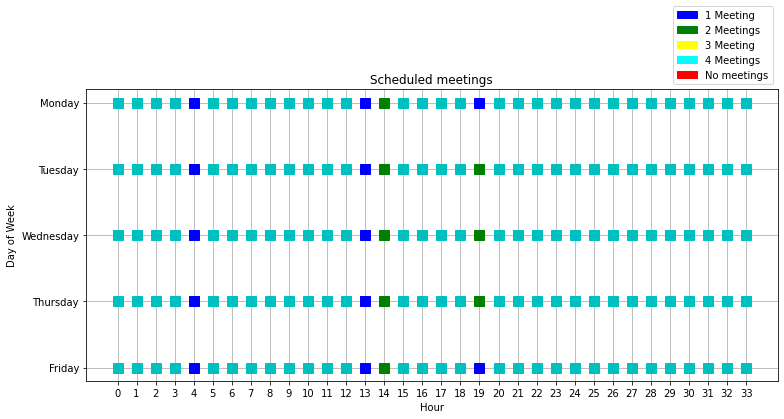

num meetings:  628


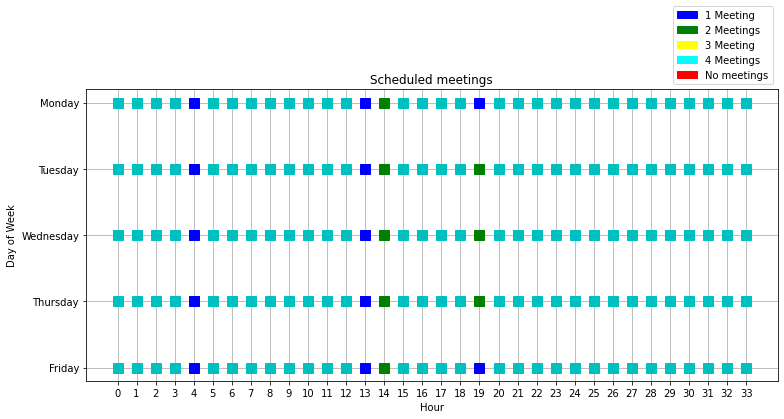

num meetings:  628


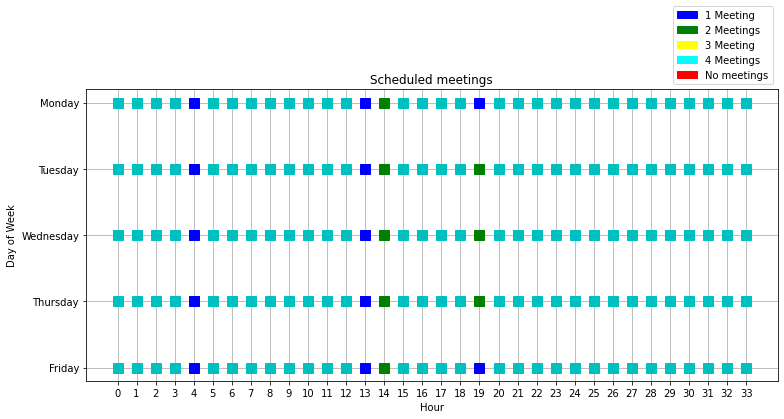

num meetings:  628


In [300]:
for seed in seeds:
    plot_tabu_schedule_map(tabu_schedule_chairs[tabu_schedule_chairs['seed']==seed])

In [282]:
seeds

array(['0', '423874', '2635142', '8364142', '9473625'], dtype=object)

In [290]:
tabu_schedule_chairs

,seed,day,time,participant
0,0,0,0,2
1,0,0,0,3
2,0,0,0,7
3,0,0,0,9
4,0,0,1,7
...,...,...,...,...
3139,9473625,4,32,9
3140,9473625,4,33,0
3141,9473625,4,33,3
3142,9473625,4,33,6


In [326]:
def equity_chart(equity_df,seeds,participant):
    
    plt.title(f'Equity for {participant}')
    plt.xlabel('iteration')
    plt.ylabel('equity')
    for seed in seeds:
        #print(equity_df[equity_df['seed']==seed]['iteration'].to_numpy())
        plt.plot(equity_df[equity_df['seed']==seed]['iteration'].to_numpy(), equity_df[equity_df['seed']==seed]['equity'].to_numpy(), label=f'seed: \'{seed}\'')
    plt.legend() 
    plt.show()

In [309]:
tabu_equity_chairs = pd.read_csv('data/tabusearch/equityHistoryChair.csv')
tabu_equity_chairs = tabu_equity_chairs.where(tabu_equity_chairs['seed']!='seed').dropna()
tabu_equity_chairs['iteration'] = tabu_equity_chairs['iteration'].apply(ast.literal_eval)
tabu_equity_chairs['equity'] = tabu_equity_chairs['equity'].apply(ast.literal_eval)
tabu_equity_chairs

,seed,iteration,equity
0,0,0,571.4
1,0,1,542.6
2,0,2,514.2
3,0,3,491.0
4,0,4,467.8
...,...,...,...
2863,9473625,578,13.4
2864,9473625,579,13.4
2865,9473625,580,13.4
2866,9473625,581,13.4


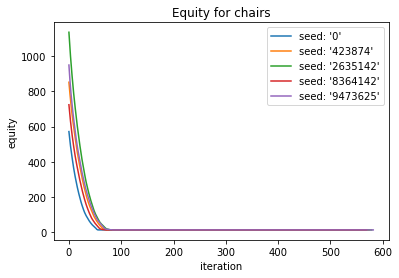

In [327]:
equity_chart(tabu_equity_chairs,seeds,'chairs')

In [310]:
tabu_equity_members = pd.read_csv('data/tabusearch/equityHistory.csv')
tabu_equity_members = tabu_equity_members.where(tabu_equity_members['seed']!='seed').dropna()
tabu_equity_members['iteration'] = tabu_equity_members['iteration'].apply(ast.literal_eval)
tabu_equity_members['equity'] = tabu_equity_members['equity'].apply(ast.literal_eval)
tabu_equity_members

,seed,iteration,equity
0,0,0,2757.533333
1,0,1,2698.733333
2,0,2,2645.533333
3,0,3,2595.533333
4,0,4,2547.533333
...,...,...,...
5343,9473625,762,85.933333
5344,9473625,763,85.933333
5345,9473625,764,85.933333
5346,9473625,765,85.933333


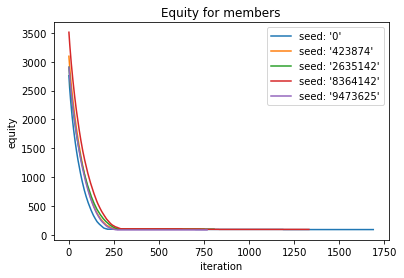

In [328]:
equity_chart(tabu_equity_members,seeds,'members')